In [1]:
pip install numpy pandas xgboost scikit-learn matplotlib seaborn scipy statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing essential libraries

# Data Handling & Preprocessing
import numpy as np                  # For numerical operations
import pandas as pd                 # For data manipulation
import time                          # To measure execution time

# Data Visualization
import matplotlib.pyplot as plt      # For plotting graphs
import seaborn as sns                # For better visualizations

# Statistical Analysis
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Preprocessing & Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning Metrics & Model Evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

# Model Selection & Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# XGBoost for Gradient Boosting
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

print("All necessary libraries imported successfully!")


All necessary libraries imported successfully!


In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load the dataset
df =  pd.read_csv (r"C:\Users\user\Desktop\CCFD\Credit_Card-Fraud_Detection\creditcard.csv")
# file_path = r"C:\Users\user\Desktop\CCFD\Credit_Card-Fraud_Detection\creditcard.csv"
# df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

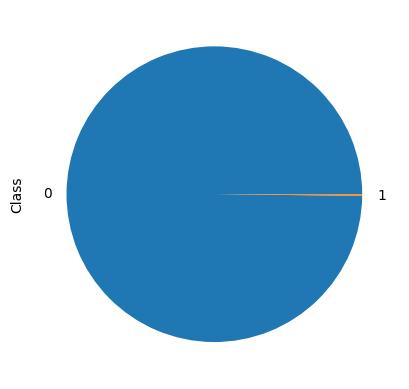

In [9]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count() / df['Class'].count()) * 100)

# Plot class distribution as a pie chart
((df.groupby('Class')['Class'].count() / df['Class'].count()) * 100).plot.pie()


In [10]:
# Checking the percentage distribution of normal vs fraud transactions
classes = df['Class'].value_counts()  # Count occurrences of each class

# Calculate percentage of normal (non-fraud) transactions
normal_share = (classes[0] / df['Class'].count()) * 100  

# Calculate percentage of fraud transactions
fraud_share = (classes[1] / df['Class'].count()) * 100  

# Print the calculated percentages
print(normal_share)
print(fraud_share)


99.82725143693798
0.1727485630620034


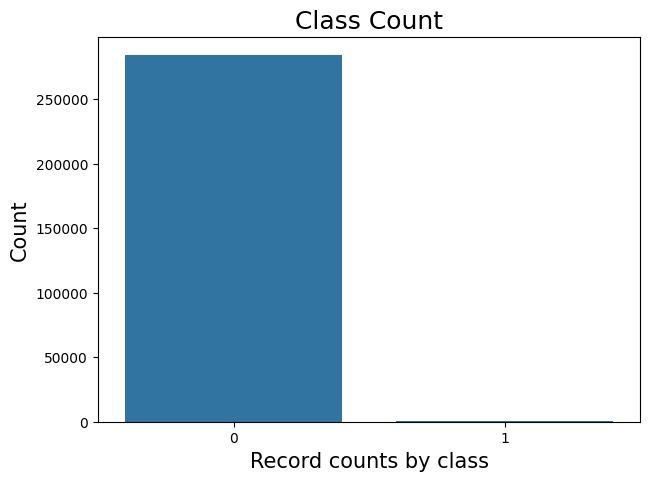

In [11]:
# Create a bar plot for the number and percentage of fraud vs non-fraud transactions
plt.figure(figsize=(7, 5))  # Set the figure size

# Create a count plot to visualize the distribution of the 'Class' column
sns.countplot(x=df['Class'])

# Add title and labels with appropriate font sizes
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Show the plot
plt.show()


In [12]:
# Checking the correlation between features in the dataset
corr = df.corr()  # Compute the correlation matrix
corr  # Display the correlation matrix


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


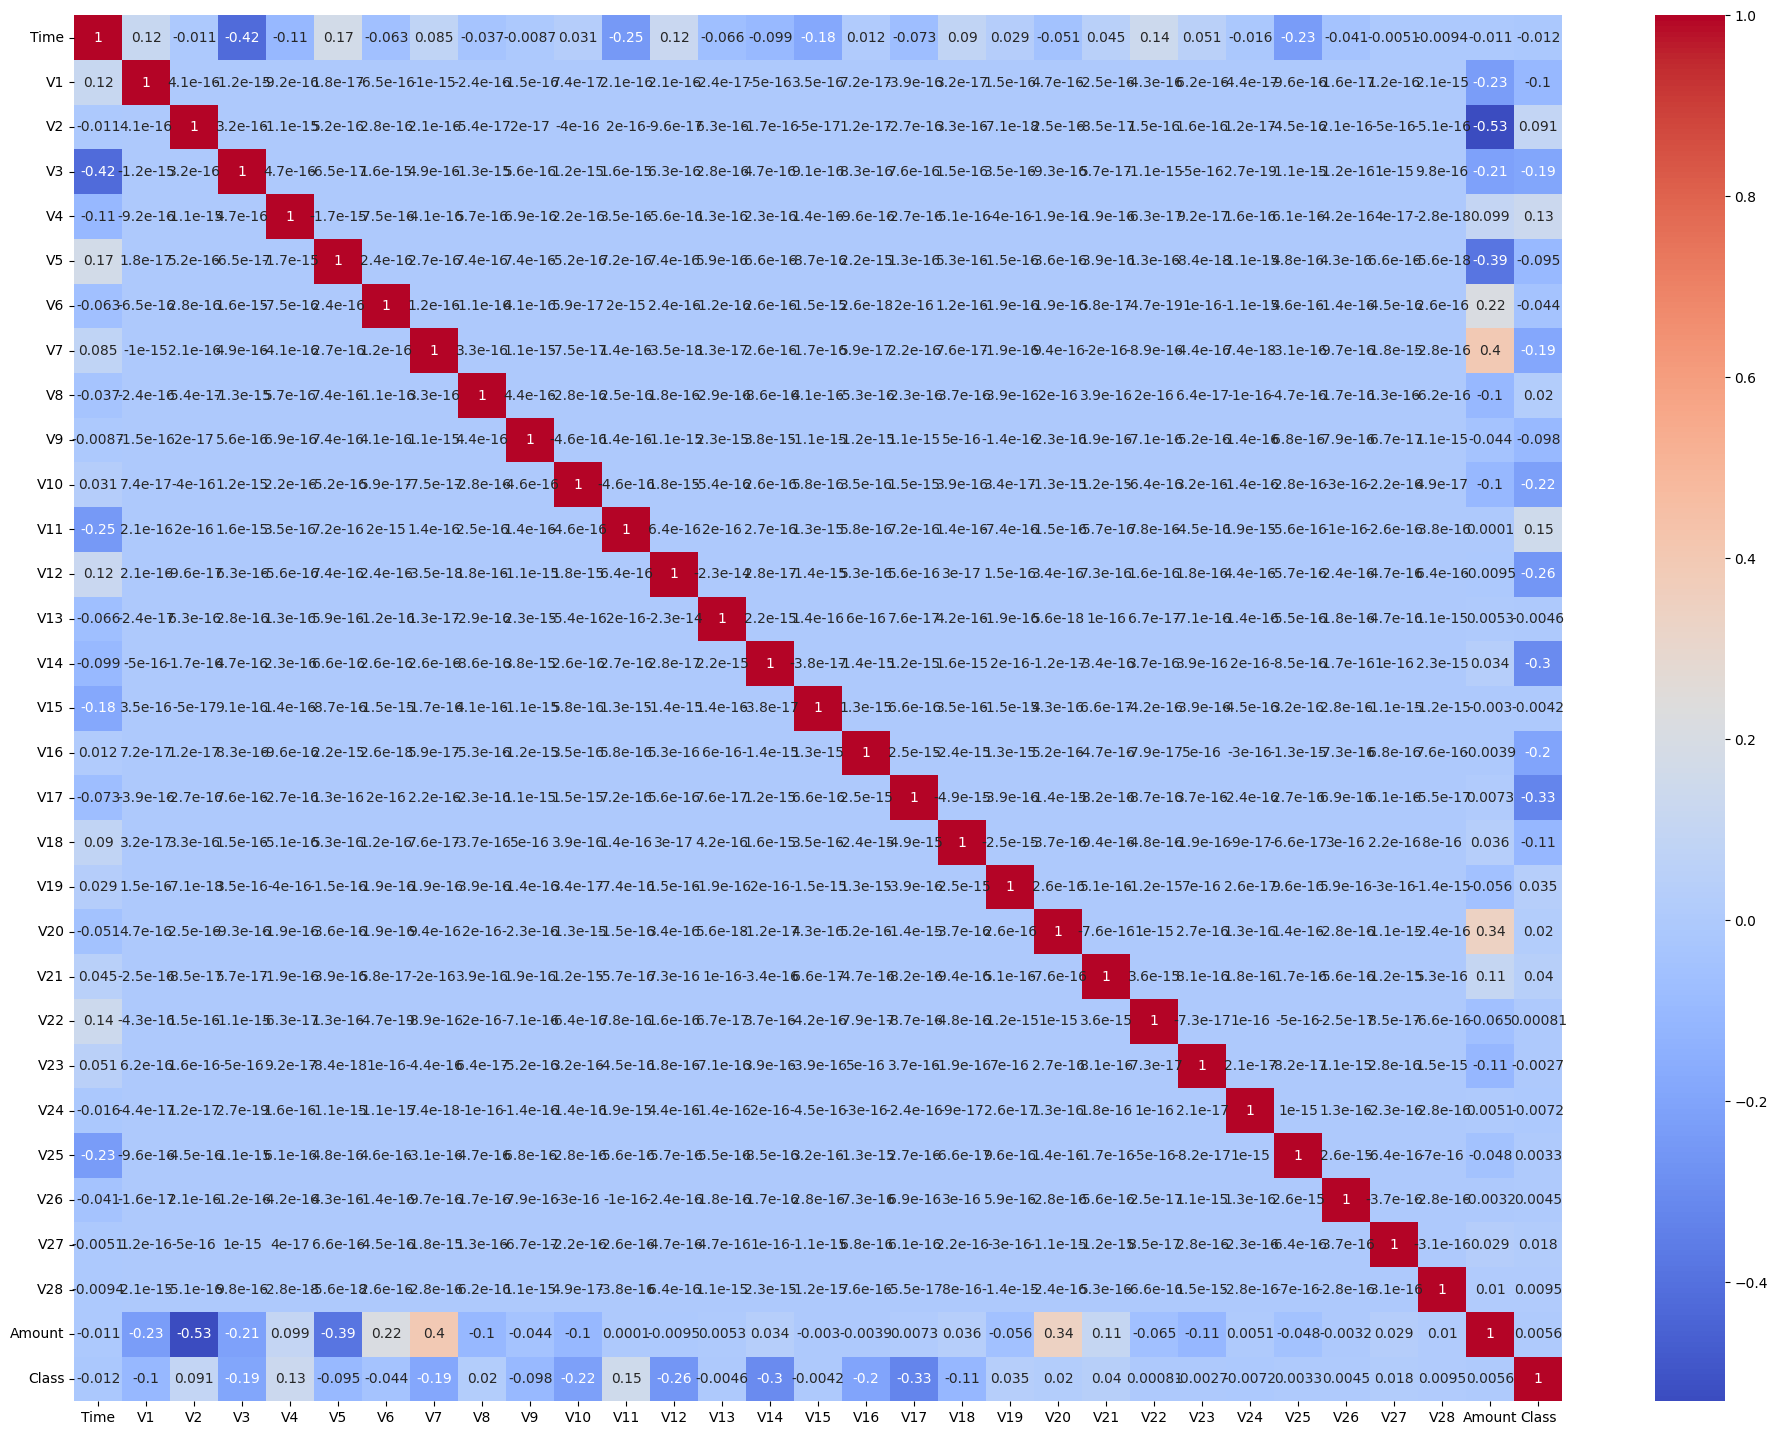

In [13]:
# Checking the correlation in a heatmap
plt.figure(figsize=(24, 18))  # Set figure size for better visibility

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True)

# Show the plot
plt.show()


In [14]:
# As time is given in relative fashion, we are using pandas.Timedelta 
# which represents a duration, the difference between two timestamps
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

# Create derived columns for Days, Hours, and Minutes
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [15]:
# Drop unnecessary columns
# We will drop the 'Time' column as we have derived the Day/Hour/Minutes from it
df.drop('Time', axis=1, inplace=True)

# We will keep only the derived column 'Time_Hour' as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)


In [16]:
# Splitting the dataset into features (X) and target variable (y)
y = df['Class']  # Target variable (Fraud or Not Fraud)
X = df.drop(['Class'], axis=1)  # Features (all columns except 'Class')

# Checking some rows of X to verify the dataset structure
X.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
# Splitting the dataset using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [19]:
# Preserve X_test & y_test to evaluate on the test data once you build the model

# Checking the spread of data post-split
print(np.sum(y))        # Total number of fraud cases in the dataset
print(np.sum(y_train))  # Number of fraud cases in the training set
print(np.sum(y_test))   # Number of fraud cases in the test set

492
396
96


In [20]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

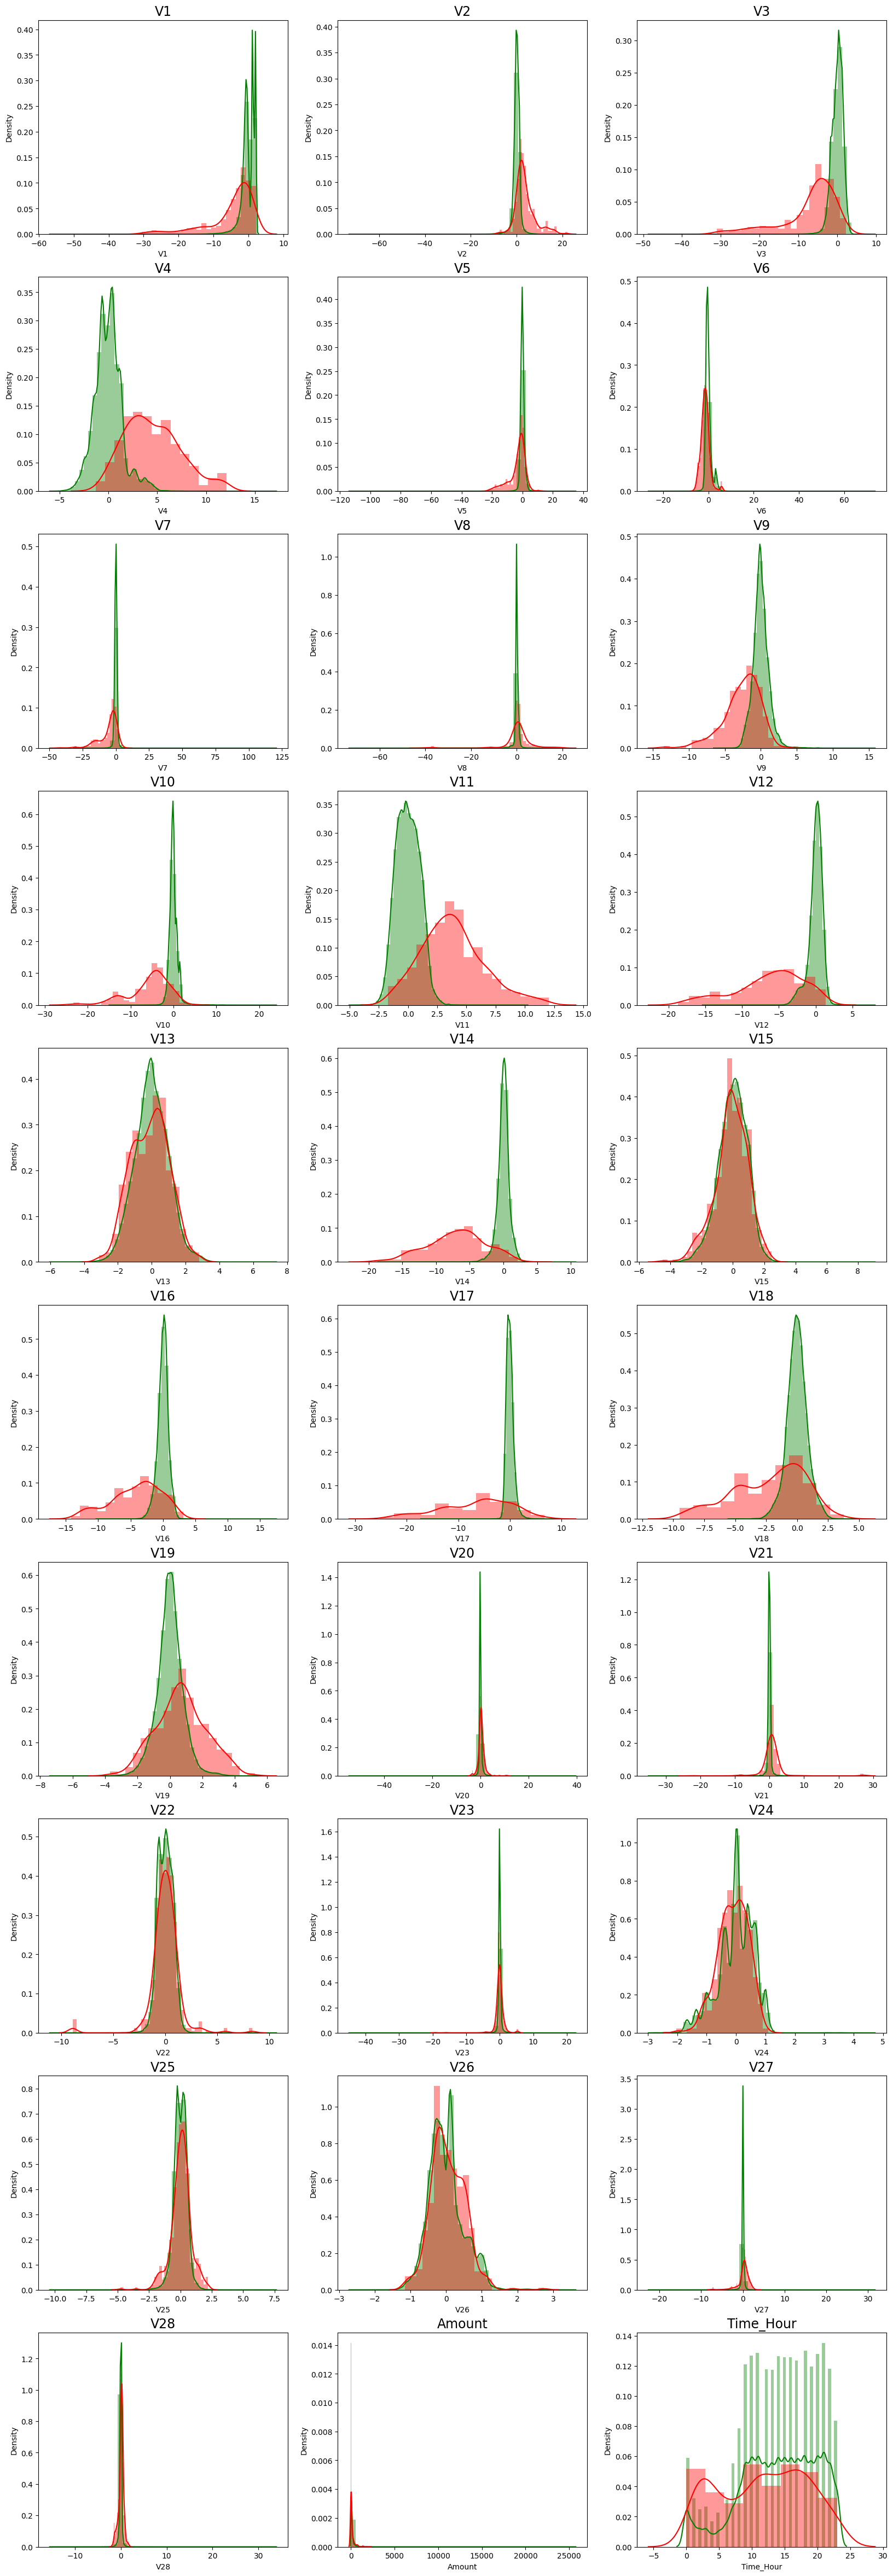

In [21]:
# Plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0  # Non-fraud transactions
fraud_records = df.Class == 1   # Fraudulent transactions

plt.figure(figsize=(20, 60))  # Set the figure size

# Loop through all columns and plot their distributions
for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)  # Arrange subplots in a 10x3 grid
    sns.distplot(X[col][normal_records], color='green')  # Distribution of non-fraud transactions
    sns.distplot(X[col][fraud_records], color='red')  # Distribution of fraud transactions
    plt.title(col, fontsize=17)  # Add title for each plot

plt.show()  # Show all subplots

In [22]:
#Model Building PArt

In [23]:

# Create a dataframe to store results of different models
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])


In [24]:
# Create a common function to plot the confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, pred_test)

    plt.clf()  # Clear the current figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)  # Plot the confusion matrix with colors
    plt.title('Confusion Matrix - Test Data')  # Set the title

    # Define class names
    categoryNames = ['Non-Fraudulent', 'Fraudulent']
    
    # Label axes
    plt.ylabel('True label')  # Actual values
    plt.xlabel('Predicted label')  # Predicted values

    # Define tick positions
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)  # X-axis labels
    plt.yticks(ticks, categoryNames)  # Y-axis labels

    # Define labels for matrix cells (TN, FP, FN, TP)
    s = [['TN', 'FP'], ['FN', 'TP']]

    # Loop through matrix and annotate each cell with values
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12)

    plt.show()  # Display the plot

In [25]:
# Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    # Importing necessary libraries
    from sklearn import linear_model  # Importing linear_model module from sklearn
    from sklearn.model_selection import KFold  # Importing KFold for cross-validation
    import numpy as np  # Importing numpy for numerical operations

    # Defining a range of values for the regularization parameter C
    num_C = list(np.power(10.0, np.arange(-10, 10)))

    # Setting up 10-fold cross-validation
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic Regression with L2 (Ridge) regularization
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l2',  # Using L2 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='newton-cg',  # Using the 'newton-cg' solver (suitable for L2)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Logistic Regression with L1 (Lasso) regularization
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l1',  # Using L1 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='liblinear',  # Using the 'liblinear' solver (suitable for L1)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Fitting the L1 and L2 models to the training data
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    # Printing the maximum AUC ROC score for L1 and L2 regularization
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    # Printing the parameters for L1 regularization
    print("Parameters for L1 regularization")
    print(searchCV_l1.coef_)  # Printing coefficients of the L1 model
    print(searchCV_l1.intercept_)  # Printing intercept of the L1 model
    print(searchCV_l1.scores_)  # Printing scores for the L1 model

    # Printing the parameters for L2 regularization
    print("Parameters for L2 regularization")
    print(searchCV_l2.coef_)  # Printing coefficients of the L2 model
    print(searchCV_l2.intercept_)  # Printing intercept of the L2 model
    print(searchCV_l2.scores_)  # Printing scores for the L2 model

    # Making predictions using both models
    y_pred_l1 = searchCV_l1.predict(X_test)  # Predictions using L1 model
    y_pred_l2 = searchCV_l2.predict(X_test)  # Predictions using L2 model

    return y_pred_l1, y_pred_l2  # Returning the predicted values


In [26]:
# Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    # Importing necessary libraries
    from sklearn import linear_model  # Importing linear_model module from sklearn
    from sklearn.model_selection import KFold  # Importing KFold for cross-validation
    import numpy as np  # Importing numpy for numerical operations

    # Defining a range of values for the regularization parameter C
    num_C = list(np.power(10.0, np.arange(-10, 10)))

    # Setting up 10-fold cross-validation
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic Regression with L2 (Ridge) regularization
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l2',  # Using L2 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='newton-cg',  # Using the 'newton-cg' solver (suitable for L2)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Logistic Regression with L1 (Lasso) regularization
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l1',  # Using L1 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='liblinear',  # Using the 'liblinear' solver (suitable for L1)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Fitting the L1 and L2 models to the training data
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    # Printing the maximum AUC ROC score for L1 and L2 regularization
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    # Printing the parameters for L1 regularization
    print("Parameters for L1 regularization")
    print(searchCV_l1.coef_)  # Printing coefficients of the L1 model
    print(searchCV_l1.intercept_)  # Printing intercept of the L1 model
    print(searchCV_l1.scores_)  # Printing scores for the L1 model

    # Printing the parameters for L2 regularization
    print("Parameters for L2 regularization")
    print(searchCV_l2.coef_)  # Printing coefficients of the L2 model
    print(searchCV_l2.intercept_)  # Printing intercept of the L2 model
    print(searchCV_l2.scores_)  # Printing scores for the L2 model

    # Making predictions using both models
    y_pred_l1 = searchCV_l1.predict(X_test)  # Predictions using L1 model
    y_pred_l2 = searchCV_l2.predict(X_test)  # Predictions using L2 model

    return y_pred_l1, y_pred_l2  # Returning the predicted values


In [27]:
# Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    # Importing necessary libraries
    from sklearn import linear_model  # Importing linear_model module from sklearn
    from sklearn.model_selection import KFold  # Importing KFold for cross-validation
    import numpy as np  # Importing numpy for numerical operations

    # Defining a range of values for the regularization parameter C
    num_C = list(np.power(10.0, np.arange(-10, 10)))

    # Setting up 10-fold cross-validation
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic Regression with L2 (Ridge) regularization
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l2',  # Using L2 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='newton-cg',  # Using the 'newton-cg' solver (suitable for L2)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Logistic Regression with L1 (Lasso) regularization
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,  # Setting the range of regularization parameters
        penalty='l1',  # Using L1 regularization
        scoring='roc_auc',  # Evaluating using ROC AUC score
        cv=cv_num,  # Applying cross-validation
        random_state=42,  # Ensuring reproducibility
        max_iter=10000,  # Setting maximum iterations for convergence
        fit_intercept=True,  # Including an intercept term
        solver='liblinear',  # Using the 'liblinear' solver (suitable for L1)
        tol=10  # Setting tolerance for stopping criteria
    )

    # Fitting the L1 and L2 models to the training data
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)

    # Printing the maximum AUC ROC score for L1 and L2 regularization
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    # Printing the parameters for L1 regularization
    print("Parameters for L1 regularization")
    print(searchCV_l1.coef_)  # Printing coefficients of the L1 model
    print(searchCV_l1.intercept_)  # Printing intercept of the L1 model
    print(searchCV_l1.scores_)  # Printing scores for the L1 model

    # Printing the parameters for L2 regularization
    print("Parameters for L2 regularization")
    print(searchCV_l2.coef_)  # Printing coefficients of the L2 model
    print(searchCV_l2.intercept_)  # Printing intercept of the L2 model
    print(searchCV_l2.scores_)  # Printing scores for the L2 model

    # Making predictions using both models
    y_pred_l1 = searchCV_l1.predict(X_test)  # Predictions using L1 model
    y_pred_l2 = searchCV_l2.predict(X_test)  # Predictions using L2 model

    return y_pred_l1, y_pred_l2  # Returning the predicted values



In [28]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a function to build, train, and evaluate a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    """
    This function builds a KNN model, trains it on the training dataset,
    evaluates it on the test dataset, and calculates performance metrics.
    """
    
    # Create a KNN model with 5 neighbors and 16 parallel jobs for faster computation
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    
    # Train the KNN model using the training dataset
    knn.fit(X_train, y_train)
    
    # Compute the model score (accuracy) on the test dataset
    score = knn.score(X_test, y_test)
    print("Model Score:")
    print(score)
    
    # Predict labels for the test dataset
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy of the model
    KNN_Accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))  # Displays the confusion matrix
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))  # Displays precision, recall, f1-score, etc.
    
    # Get probability estimates for positive class (1)
    knn_probs = knn.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN ROC Value: {:.4f}".format(knn_roc_value))
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    
    # Determine the optimal threshold (where TPR - FPR is maximized)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN Threshold: {:.4f}".format(threshold))
    
    # Compute AUC (Area Under the Curve) for ROC
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    # Append model results to a DataFrame
    df_Results = df_Results.append(pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [score],
        'ROC Value': [knn_roc_value]
    }), ignore_index=True)
    
    # Return the updated results DataFrame
    return df_Results


In [29]:


# Define a function to build, train, and evaluate Decision Tree models
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    """
    This function builds Decision Tree models using both 'gini' and 'entropy' criteria,
    trains them on the training dataset, evaluates them on the test dataset, and calculates performance metrics.
    """
    
    # Define criteria for Decision Tree ('gini' and 'entropy')
    criteria = ['gini', 'entropy']
    
    # Dictionary to store scores for different criteria
    scores = {}

    # Loop through both criteria to build and evaluate models
    for c in criteria:
        # Create a Decision Tree Classifier with the given criterion
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        
        # Train the Decision Tree model using the training dataset
        dt.fit(X_train, y_train)
        
        # Predict labels for the test dataset
        y_pred = dt.predict(X_test)
        
        # Compute the model score (accuracy) on the test dataset
        test_score = dt.score(X_test, y_test)
        
        # Get probability estimates for the positive class (1)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        
        # Calculate ROC AUC score
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        
        # Store the test score in the dictionary
        scores[c] = test_score
        
        # Print the results
        print(f"{c} score: {test_score:.4f}")
        
        # Print confusion matrix
        print("Confusion Matrix:")
        Plot_confusion_matrix(y_test, y_pred)  # Assuming a function exists to plot confusion matrix
        
        # Print classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Print ROC AUC value
        print(f"{c} tree_roc_value: {tree_roc_value:.4f}")
        
        # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
        fpr, tpr, thresholds = roc_curve(y_test, tree_preds)
        
        # Determine the optimal threshold (where TPR - FPR is maximized)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"Tree threshold: {threshold:.4f}")
        
        # Compute AUC (Area Under the Curve) for ROC
        roc_auc = metrics.auc(fpr, tpr)
        print(f"ROC for the test dataset: {roc_auc:.1%}")
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc:.4f}")
        plt.legend(loc=4)
        plt.show()

    return scores  # Returning scores dictionary instead of appending to df_Results (adjust as needed)


In [30]:
# Function to build and evaluate a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Create a Random Forest model with 100 trees (estimators)
    RF_model = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                      bootstrap=True,  # Enable bootstrap sampling
                                      max_features='sqrt',  # Number of features considered per split
                                      random_state=42)  # Random seed for reproducibility
    
    # Train the model on the training data
    RF_model.fit(X_train, y_train)
    
    # Evaluate model accuracy on test data
    RF_test_score = RF_model.score(X_test, y_test)
    
    # Print model accuracy
    print('Model Accuracy: {0}'.format(RF_test_score))
    
    # Generate predictions on test data
    rf_predictions = RF_model.predict(X_test)
    
    # Print Confusion Matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test, rf_predictions))
    
    # Print Classification Report
    print("Classification Report")
    print(classification_report(y_test, rf_predictions))
    
    # Get probability estimates for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    return RF_test_score, rf_predictions, rf_probs

# Function to evaluate XGBoost model results
def evaluateXGBoostModel(df_Results, Methodology, y_test, XGB_probs, XGB_test_score):
    # Compute ROC AUC score
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for ROC curve
    fpr, tpr, thresholds = roc_auc_score(y_test, XGB_probs)
    
    # Determine optimal threshold using maximum difference between TPR and FPR
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    
    # Compute area under the ROC curve
    roc_auc = np.trapz(tpr, fpr)  # Alternative to roc_auc_score
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    # Store results in dataframe
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,
                                                  'Model': 'XGBoost',
                                                  'Accuracy': XGB_test_score,
                                                  'roc_value': XGB_roc_value}, index=[0]))
    return df_Results


In [31]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test):
    #Evaluate SVM model with sigmoid kernel model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier 
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc value: {0}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    optimal_threshold = thresholds[np.argmax(tpr-fpr)]
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)

In [32]:
#Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4      7      9 ... 284789 284792 284794]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     18     22 ... 284800 284801 284802]
TRAIN: [     0      1      2 ... 284802 284803 284806] TEST: [     5      6     17 ... 284798 284804 284805]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2     13 ... 284753 284759 284762]
TRAIN: [     0      1      2 ... 284802 284804 284805] TEST: [     3      8     11 ... 284788 284803 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      4      5 ... 284797 284798 284802]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0     19     22 ... 284785 284788 284806]
TRAIN: [     0      1      3 ... 284803 284804 284806] TEST: [     2      6      7 ... 284792 284794 284805]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     16     23 ... 284796 284800 284803]
TRAIN: [     0     

In [33]:
# #Run Logistic Regression with L1 and L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60)

# #Run KNN Model
# print("KNN Model")
# start_time = time.time()
# df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60)

# #Run Decision Tree Models with 'gini' & 'entropy' criteria
# print("Decision Tree Models with 'gini' & 'entropy' criteria")
# start_time = time.time()
# df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60)

# #Run Random Forest Model
# print("Random Forest Model")
# start_time = time.time()
# df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60)

# #Run XGBoost Modela
# print("XGBoost Model")
# start_time = time.time()
# df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('--*60')

# #Run SVM Model with Sigmoid Kernel
# print("SVM Model with Sigmoid Kernel")
# start_time = time.time()
# df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print("Before running models, type of df_Results:", type(df_Results))


KNN Model
Model Score:
0.9992099857797441
Confusion Matrix:
[[56863     6]
 [   39    53]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.90      0.58      0.70        92

    accuracy                           1.00     56961
   macro avg       0.95      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN ROC Value: 0.8585
KNN Threshold: 0.2000
ROC for the test dataset: 85.8%


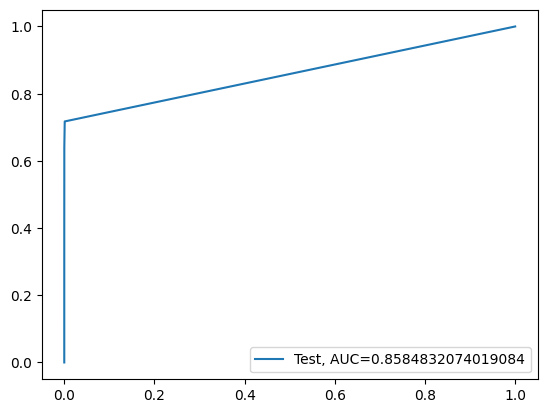

Time Taken by Model: --- 22.8086895942688 seconds ---
------------------------------------------------------------


In [34]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a function to build, train, and evaluate a KNN model
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    """
    This function builds a KNN model, trains it on the training dataset,
    evaluates it on the test dataset, and calculates performance metrics.
    """
    
    # Ensure df_Results is a DataFrame (checking if it's not a tuple or anything else)
    if not isinstance(df_Results, pd.DataFrame):
        raise ValueError("df_Results should be a pandas DataFrame!")
    
    # Create a KNN model with 5 neighbors and 16 parallel jobs for faster computation
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    
    # Train the KNN model using the training dataset
    knn.fit(X_train, y_train)
    
    # Compute the model score (accuracy) on the test dataset
    score = knn.score(X_test, y_test)
    print("Model Score:")
    print(score)
    
    # Predict labels for the test dataset
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy of the model
    KNN_Accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))  # Displays the confusion matrix
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))  # Displays precision, recall, f1-score, etc.
    
    # Get probability estimates for positive class (1)
    knn_probs = knn.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN ROC Value: {:.4f}".format(knn_roc_value))
    
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    
    # Determine the optimal threshold (where TPR - FPR is maximized)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN Threshold: {:.4f}".format(threshold))
    
    # Compute AUC (Area Under the Curve) for ROC
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label="Test, AUC=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    # Append model results to a DataFrame using pd.concat
    new_data = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [score],
        'ROC Value': [knn_roc_value]
    })
    
    # Concatenate the old df_Results with the new data
    df_Results = pd.concat([df_Results, new_data], ignore_index=True)
    
    # Return the updated results DataFrame
    return df_Results

# Ensure df_Results is a DataFrame before calling models
if not isinstance(df_Results, pd.DataFrame):
    df_Results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC Value"])

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)


In [35]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure df_Results is a DataFrame before calling models
if not isinstance(df_Results, pd.DataFrame):
    df_Results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC Value"])

# Function to build and run Logistic Regression Models
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    """
    This function builds and evaluates Logistic Regression models with L1 and L2 regularization.
    """
    # Logistic Regression with L1 regularization
    logistic_L1 = LogisticRegression(penalty='l1', solver='liblinear')
    logistic_L1.fit(X_train, y_train)
    score_L1 = logistic_L1.score(X_test, y_test)
    
    y_pred_L1 = logistic_L1.predict(X_test)
    logistic_L1_roc_value = roc_auc_score(y_test, logistic_L1.predict_proba(X_test)[:, 1])
    
    # Print the results
    print("Logistic Regression (L1 Regularization) - Accuracy:", score_L1)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred_L1))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_L1))
    print("ROC Value:", logistic_L1_roc_value)
    
    # Append results to df_Results using pd.concat
    new_data_L1 = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression L1'],
        'Accuracy': [score_L1],
        'ROC Value': [logistic_L1_roc_value]
    })
    
    df_Results = pd.concat([df_Results, new_data_L1], ignore_index=True)

    # Logistic Regression with L2 regularization
    logistic_L2 = LogisticRegression(penalty='l2', solver='liblinear')
    logistic_L2.fit(X_train, y_train)
    score_L2 = logistic_L2.score(X_test, y_test)
    
    y_pred_L2 = logistic_L2.predict(X_test)
    logistic_L2_roc_value = roc_auc_score(y_test, logistic_L2.predict_proba(X_test)[:, 1])
    
    # Print the results
    print("Logistic Regression (L2 Regularization) - Accuracy:", score_L2)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred_L2))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_L2))
    print("ROC Value:", logistic_L2_roc_value)
    
    # Append results to df_Results using pd.concat
    new_data_L2 = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['Logistic Regression L2'],
        'Accuracy': [score_L2],
        'ROC Value': [logistic_L2_roc_value]
    })
    
    df_Results = pd.concat([df_Results, new_data_L2], ignore_index=True)

    # Return the updated results DataFrame
    return df_Results

# Function to build, train, and evaluate a KNN model (same as before)
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    """
    This function builds a KNN model, trains it on the training dataset,
    evaluates it on the test dataset, and calculates performance metrics.
    """
    # KNN model definition (same as before)
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    knn_roc_value = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    
    # Print the results
    print("KNN Model - Accuracy:", score)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC Value:", knn_roc_value)

    # Append results to df_Results using pd.concat
    new_data_KNN = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': ['KNN'],
        'Accuracy': [score],
        'ROC Value': [knn_roc_value]
    })
    
    df_Results = pd.concat([df_Results, new_data_KNN], ignore_index=True)
    
    return df_Results

# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Logistic Regression Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by KNN Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60)



Logistic Regression with L1 And L2 Regularisation
Logistic Regression (L1 Regularization) - Accuracy: 0.999350432752234
Confusion Matrix:
[[56860     9]
 [   28    64]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.88      0.70      0.78        92

    accuracy                           1.00     56961
   macro avg       0.94      0.85      0.89     56961
weighted avg       1.00      1.00      1.00     56961

ROC Value: 0.9692709101848871
Logistic Regression (L2 Regularization) - Accuracy: 0.9993153210091115
Confusion Matrix:
[[56860     9]
 [   30    62]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.87      0.67      0.76        92

    accuracy                           1.00     56961
   macro avg       0.94      0.84      0.88     56961
weighted avg       1.00      1.00   

Running Logistic Regression L1...


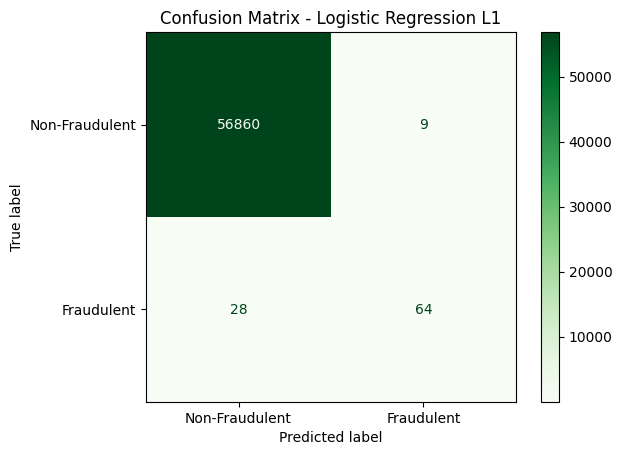

Time Taken by Logistic Regression L1: --- 5.148597002029419 seconds ---
------------------------------------------------------------
Running Logistic Regression L2...


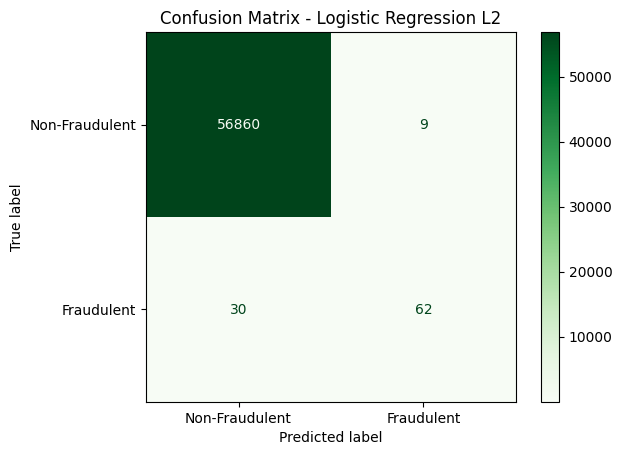

Time Taken by Logistic Regression L2: --- 4.9304587841033936 seconds ---
------------------------------------------------------------
Running KNN...


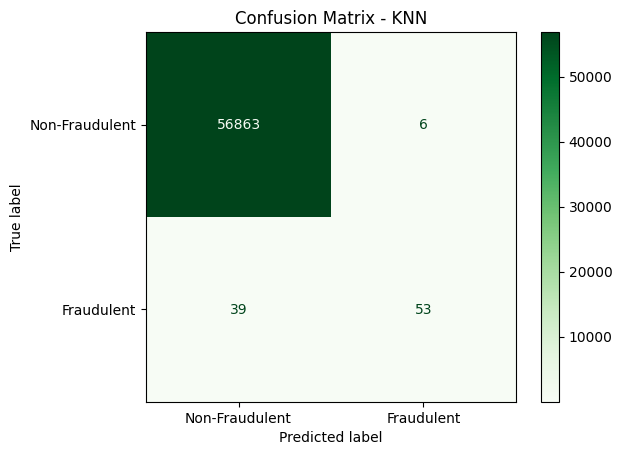

Time Taken by KNN: --- 23.03995633125305 seconds ---
------------------------------------------------------------
Running Decision Tree Gini...


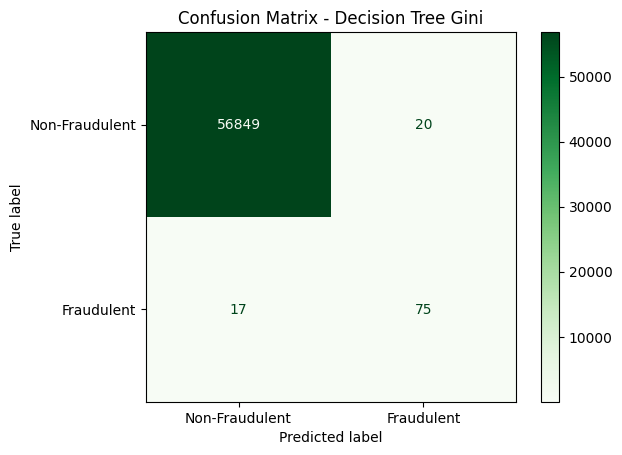

Time Taken by Decision Tree Gini: --- 12.41907811164856 seconds ---
------------------------------------------------------------
Running Decision Tree Entropy...


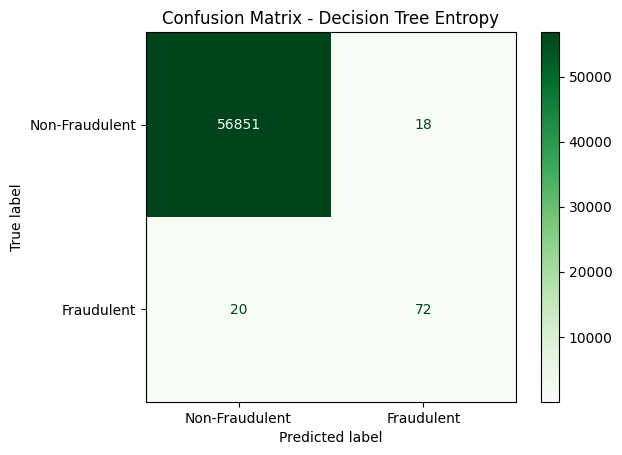

Time Taken by Decision Tree Entropy: --- 8.041896343231201 seconds ---
------------------------------------------------------------
Running Random Forest...


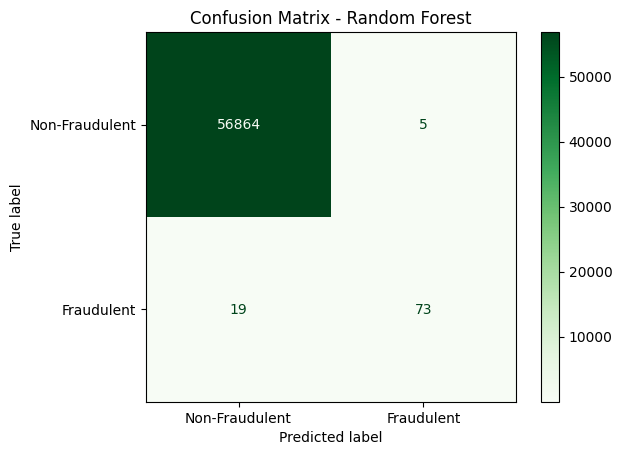

Time Taken by Random Forest: --- 20.799851655960083 seconds ---
------------------------------------------------------------
Running XGBoost...


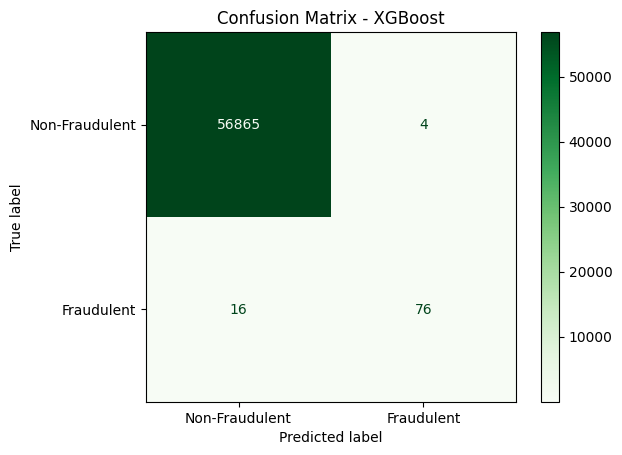

Time Taken by XGBoost: --- 1.204063892364502 seconds ---
------------------------------------------------------------
Running SVM Sigmoid...


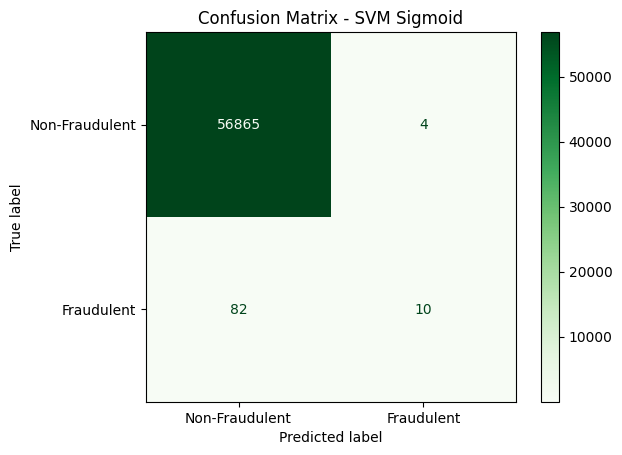

Time Taken by SVM Sigmoid: --- 59.86712074279785 seconds ---
------------------------------------------------------------
Final Results:
                       Methodology                   Model  Accuracy  \
0   RepeatedKFold Cross Validation                     KNN  0.999210   
1   RepeatedKFold Cross Validation  Logistic Regression L1  0.999350   
2   RepeatedKFold Cross Validation  Logistic Regression L2  0.999315   
3   RepeatedKFold Cross Validation                     KNN  0.999210   
4   RepeatedKFold Cross Validation  Logistic Regression L1  0.999350   
5   RepeatedKFold Cross Validation  Logistic Regression L2  0.999315   
6   RepeatedKFold Cross Validation                     KNN  0.999210   
7   RepeatedKFold Cross Validation      Decision Tree Gini  0.999350   
8   RepeatedKFold Cross Validation   Decision Tree Entropy  0.999333   
9   RepeatedKFold Cross Validation           Random Forest  0.999579   
10  RepeatedKFold Cross Validation                 XGBoost  0.999649   

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import time

# Initialize df_Results if not already a DataFrame
if 'df_Results' not in locals() or not isinstance(df_Results, pd.DataFrame):
    df_Results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC Value"])

# Function to plot and display the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraudulent', 'Fraudulent'])
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# General function to build and evaluate models with confusion matrix plotting
def build_and_evaluate_model(model, model_name, df_Results, Methodology, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    roc_value = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Append results
    new_data = pd.DataFrame({
        'Methodology': [Methodology],
        'Model': [model_name],
        'Accuracy': [score],
        'ROC Value': [roc_value]
    })
    df_Results = pd.concat([df_Results, new_data], ignore_index=True)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    return df_Results

# Models to evaluate
models = [
    (LogisticRegression(penalty='l1', solver='liblinear'), "Logistic Regression L1"),
    (LogisticRegression(penalty='l2', solver='liblinear'), "Logistic Regression L2"),
    (KNeighborsClassifier(n_neighbors=5, n_jobs=-1), "KNN"),
    (DecisionTreeClassifier(criterion='gini'), "Decision Tree Gini"),
    (DecisionTreeClassifier(criterion='entropy'), "Decision Tree Entropy"),
    (RandomForestClassifier(n_jobs=-1), "Random Forest"),
    (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost"),
    (SVC(kernel='sigmoid', probability=True), "SVM Sigmoid")
]

# Evaluate each model
for model, model_name in models:
    print(f"Running {model_name}...")
    start_time = time.time()
    df_Results = build_and_evaluate_model(model, model_name, df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    print(f"Time Taken by {model_name}: --- {time.time() - start_time} seconds ---")
    print('-' * 60)

# Display final results
df_Results.reset_index(drop=True, inplace=True)
print("Final Results:")
print(df_Results)


In [38]:
# Let's perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)  
# X is the feature set and y is the target
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      7      9 ... 284778 284793 284799]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2     13 ... 284792 284797 284801]
TRAIN: [     1      2      5 ... 284800 284801 284803] TEST: [     0      3      4 ... 284804 284805 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    14     19     27 ... 284795 284796 284800]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    11     15     22 ... 284791 284794 284803]
